In [142]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import  seaborn as sns
sns.set_style("darkgrid")

from Utils import *
from ExperientalTools import *

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
%reload_ext autoreload
%autoreload 2

## get the dataset

In [143]:
(tr_x,tr_y) = prepare_dataset(train_path="datasets/ML-CUP21-TR.csv",unique=True)
results = {}

## fix the resevoir

In [144]:
resevoir = np.random.uniform(-1, 1, (100, 10))

# OPTIMAL SOLUTION

In [145]:
H = sigmoid(resevoir@tr_x)

In [146]:
w_star,_,_,_ = np.linalg.lstsq(H.T, tr_y.T,rcond=-1)
optimal_mse, optimal_residual = mse(w_star.T@H,tr_y), get_residual_y(tr_y,w_star.T@H)
results["optimal"] = (optimal_mse, optimal_residual)

In [147]:
print("Mean square error: ", optimal_mse)
print("Residual: ", optimal_residual)

Mean square error:  1.5979864655314555
Residual:  0.08153252674958028


## Cholesky solution

In [148]:
model = fit_cholesky(tr_x,tr_y, lambda_=1e-01, activation="sig", resevoir=resevoir)
mse_cholesky, residual_cholesky = get_results(model,tr_x,tr_y)
results["cholesky"] = (mse_cholesky, residual_cholesky)

In [149]:
print("Mean square error: ", mse_cholesky)
print("Residual: ", residual_cholesky)

Mean square error:  1.628175372688743
Residual:  0.08229907311027426


## Iterative methods

In [150]:
classical_sgd = fit_sgd(tr_x, tr_y, lambda_=0.1, activation="sig", max_inters=10000,
                        eps=0.0001, lr=0, beta=0, resevoir=resevoir, minimum=optimal_mse)
mse_classical_sgd, residual_classical_sgd = get_results(classical_sgd[0],tr_x,tr_y)
results["classical-SGD"] = (mse_classical_sgd, residual_classical_sgd)

In [151]:
momentum_sgd = fit_sgd(tr_x, tr_y, lambda_=0.1, activation="sig", max_inters=10000,
                       eps=0.0001, lr=0, beta=0.5, resevoir=resevoir, minimum=optimal_mse)
mse_momentum_sgd, residual_momentum_sgd = get_results(momentum_sgd[0],tr_x,tr_y)
results["momentum-SGD"] = (mse_momentum_sgd, residual_momentum_sgd)

In [152]:
fista = fit_fista(tr_x, tr_y, lambda_=0.1, activation="sig", max_inters=10000,
                      eps=0.0001, resevoir=resevoir, minimum=optimal_mse)
mse_fista, residual_fista = get_results(fista[0],tr_x,tr_y)
results["fista"] = (mse_fista, residual_fista)

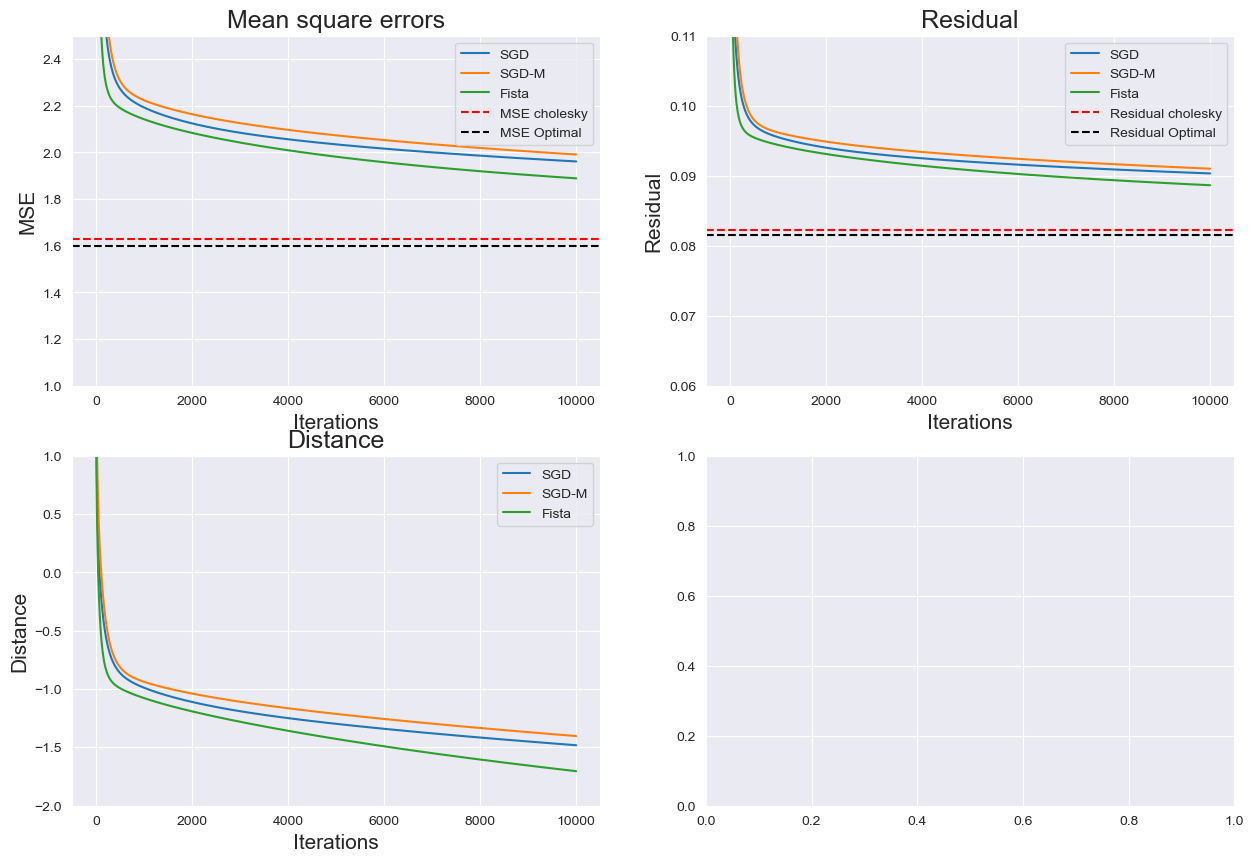

In [156]:
_, axs = plt.subplots(nrows=2,ncols=2,figsize=(15,10))

sns.lineplot(data=classical_sgd[1], x=classical_sgd[1].index, y="MSE", ax=axs[0,0], label="SGD")
sns.lineplot(data=momentum_sgd[1], x=momentum_sgd[1].index, y="MSE", ax=axs[0,0], label="SGD-M")
sns.lineplot(data=fista[1], x=fista[1].index, y="MSE", ax=axs[0,0], label="Fista")
axs[0,0].axhline(y=mse_cholesky, label="MSE cholesky", color="red", linestyle="--")
axs[0,0].axhline(y=optimal_mse, label="MSE Optimal", color="black", linestyle="--")
axs[0,0].set_title("Mean square errors",fontsize=18)
axs[0,0].set_ylabel("MSE",fontsize=15)
axs[0,0].set_xlabel("Iterations",fontsize=15)
axs[0,0].set_ylim([1,2.5])
axs[0,0].legend()

sns.lineplot(data=classical_sgd[1], x=classical_sgd[1].index, y="Residual", ax=axs[0,1], label="SGD")
sns.lineplot(data=momentum_sgd[1], x=momentum_sgd[1].index, y="Residual", ax=axs[0,1], label="SGD-M")
sns.lineplot(data=fista[1], x=fista[1].index, y="Residual", ax=axs[0,1], label="Fista")
axs[0,1].axhline(y=residual_cholesky, label="Residual cholesky", color="red", linestyle="--")
axs[0,1].axhline(y=optimal_residual, label="Residual Optimal", color="black", linestyle="--")
axs[0,1].set_title("Residual",fontsize=18)
axs[0,1].set_ylabel("Residual",fontsize=15)
axs[0,1].set_xlabel("Iterations",fontsize=15)
axs[0,1].set_ylim([0.06,0.11])
axs[0,1].legend()

sns.lineplot(data=classical_sgd[1], x=classical_sgd[1].index, y="Distance", ax=axs[1,0], label="SGD")
sns.lineplot(data=momentum_sgd[1], x=momentum_sgd[1].index, y="Distance", ax=axs[1,0], label="SGD-M")
sns.lineplot(data=fista[1], x=fista[1].index, y="Distance", ax=axs[1,0], label="Fista")
axs[1,0].set_title("Distance",fontsize=18)
axs[1,0].set_ylabel("Distance",fontsize=15)
axs[1,0].set_xlabel("Iterations",fontsize=15)
axs[1,0].set_ylim([-2,1])
axs[1,0].legend()


plt.show()

In [154]:
print(f"{'Method' : ^20}{'MSE' : ^12}{'Residual' : ^12}")

for k,v in results.items():
    print(f"{k : ^20}{round(v[0],4):^12}{round(v[1],5) : ^12}")

       Method           MSE       Residual  
      optimal          1.598      0.08153   
      cholesky         1.6282      0.0823   
   classical-SGD       1.9612     0.09033   
    momentum-SGD       1.9909     0.09101   
       fista           1.8888     0.08864   
